# Programación para la Bioinformática

Unidad 4: ADN, ARN, secuencias y motivos (Parte 2)
--------------------------------------------------

### Instrucciones de uso
A continuación se presentará la teoría y algún ejemplo de algoritmo genético. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

### Algoritmos inspirados en la naturaleza
Existe una categoría de algoritmos que utilizan conceptos basados o inspirados en la naturaleza estableciendo una metáfora que los hace más comprensibles para los humanos. Muy populares en algoritmos de inteligencia artificial, empezaron a aparecer en la década de los 70 del siglo pasado y en la última década han explotado hasta convertirse en métodos casi estándares.

Una familia de algoritmos de inteligencia artificial inspirados en la naturaleza muy populares son los **algoritmos genéticos**. Los algoritmos genéticos utilizan conceptos de la genética, como son las mutaciones, los mecanismos de selección o los cruces. Los algoritmos genéticos se utilizan con el objetivo de optimizar valores de una función cualquiera en su espacio de valores. El funcionamiento básico del algoritmo está descrito en la siguiente figura (fuente Wikipedia - https://es.wikipedia.org/wiki/Algoritmo_gen%C3%A9tico):

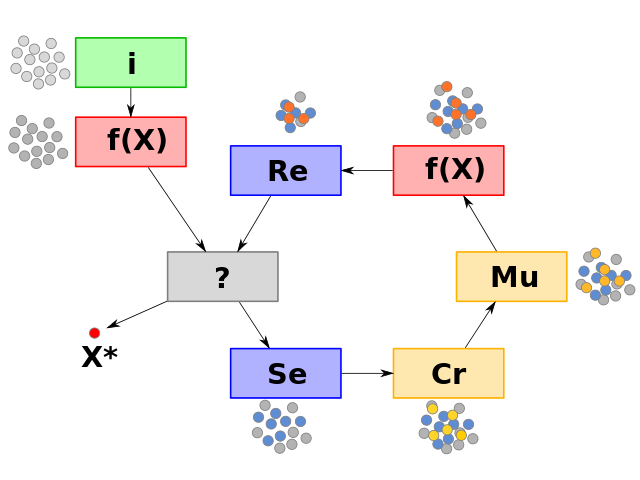

* **Inicialización** (I). Se genera aleatoriamente una población inicial, constituida por un conjunto de cromosomas (o también llamados genes) que representan posibles soluciones del problema. Esta población deberá tener una diversidad inicial lo suficientemente rica para garantizar que el algoritmo no converja de forma prematura en soluciones no óptimas.
* **Evaluación** (?). Para cada uno de los cromosomas, lo evaluaremos en el espacio de búsqueda (aplicaremos la función que deseamos optimizar) y después calcularemos la distancia a la solución que queremos obtener. Esta solución objetivo es muy importante y está codificada en la función de *fitness* que dirigirá la evolución hacia esa solución óptima (podemos conocerla o no, en este segundo caso, la expresaremos en forma de función: cuán rápido es un coche, cuál es la cantidad monetaria más grande, etc.). Deberemos, además, definir las condiciones de parada del algoritmo para no entrar en bucle infinito: o bien acotando el número de pasos del algoritmo o bien cuando en la población ya no haya cambios. 
* **Selección** (Se). Si no se ha dado la condición de parada, se procede a elegir los cromosomas que serán cruzados en la siguiente generación, para ello, seleccionaremos los mejores cromosomas ordenándolos por su aptitud.
* **Cruce** (Cr). Representa en esta metáfora la reproducción sexual y opera sobre dos cromosomas a la vez para generar dos descendientes donde se combinan las características de ambos cromosomas padres.
* **Mutación** (Mu). Modifica de forma aleatoria parte del cromosoma de los individuos de la población para añadir diversidad y poder salir de pozos locales en el espacio de búsqueda.
* **Reemplazo** (Re). Una vez aplicados los operadores genéticos, se seleccionan los mejores individuos para conformar la población de la generación siguiente y continuar con otro paso de la simulación.

### Ejercicio 1
El siguiente código es una implementación de un algoritmo genético que optimiza la búsqueda de un string, es decir, dado un string **objetivo**, intentad encontrar esa cadena empezando desde diversas cadenas con caracteres aleatorios.

In [ ]:
import random
import string

# A partir de generaciones aleatorias, buscamos este string.
objetivo = "bioinformatics_programming"

# Número de candidatos que habrá en la población
GENES = 25
# Max_generacion es la cantidad máxima de iteraciones que hará buscando una solución.
MAX_GENERACION = 10000

# Es un objeto que representa cada uno de los candidatos de la población
class Individuo(object):
    def __init__(self, adn, fitness):
        # Órdenes propias de Python para crear clases
        self.adn = adn
        self.fitness = fitness

# En esta función hay dos variables origen y valor_objetivo; como podemos ver más abajo en la llamda, origen equivale a adn y valor_objetivo equivale a objetivo.     
# Fitness es una forma de medir el error que esta cometiendo en cada iteración. Lo que hace es sumar todas las distancias entre los caracteres aleatorios y los caracteres del objetivo elevados al cuadrado (para obtener valor absoluto de esas diferencias). El objetivo es ir buscando en cada iteración una combinación aleatoria más cercana al objetivo.
def calcular_fitness(origen, valor_objetivo):
    fitness = 0
    for i in range(0, len(origen)):
        fitness += (ord(valor_objetivo[i]) - ord(origen[i])) ** 2
    return fitness

# A partir de dos adn de padres genera un nuevo hijo combinando los valores de adn de estos y añadiendo una mejora.
def mutacion(padre1, padre2):
    # Crea una variable de un hijo con el mismo adn que el padre
    adn_hijo = padre1.adn[:]

    # Generan dos números aleatorios desde el cero hasta la longitud del adn del padre menos 1.
    start = random.randint(0, len(padre2.adn) - 1)
    stop = random.randint(0, len(padre2.adn) - 1)
    # Se asegura de que el número inicial es menor que el número final.
    if start > stop:
        stop, start = start, stop

    # Ahora introduce modificaciones en el adn del hijo (hasta ahora igual que el adn del padre 1) con elementos del padre 2.
    adn_hijo[start:stop] = padre2.adn[start:stop]

    # Crea una posición aleatoria desde cero a la longitud del adn del hijo menos 1.
    posicion = random.randint(0, len(adn_hijo) - 1)
    # Quiere acceder a una posición aleatoria del adn del hijo. Para ello parte de una letra, lo convierte a número con ord, le suma -1, 1 o 0 y lo pasa a letra de nuevo con chr.
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))
    # Volvemos a llamar a la función fitness pero ahora con el adn del hijo.
    fitness_hijo = calcular_fitness(adn_hijo, objetivo)
    # Ahora crea un objeto llamado individuo con los datos del hijo.
    return Individuo(adn_hijo, fitness_hijo)

# Genera un número aleatorio entre 0 y genes-1. Si fuese entre 0 y genes podría salir la posición 25 la cual no existe porque empieza en el cero.
# Con ese número aleatorio accede a esa posición en la lista y devuelve un individuo.
def padre_al_azar(poblacion):
    return poblacion[int(random.random() * random.random() * (GENES - 1))]

# Muestra en pantalla la población de los 25 últimos candidatos y el número de generaciones.
def escribe_generacion(generacion, poblacion):
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')
    # Este bucle recorre todos los elementos de la población
    # Como adn es una lista de elementos, join los une todos.
    for candidato in poblacion:
        # Aquí introduce estos comandos para mantener el formato de la tabla alineado independientemente del número que haya.
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
    print()

# Esta función crea una lista de población con tantos candidatos como se haya definido en genes. 
def inicializa_poblacion():
    # Crea una lista llamada poblacion
    poblacion = []
    # Crea un bucle que se repetirá 25 veces (GENES=25)
    for i in range(0, GENES):
        # En la variable adn escoge un valor aleatorio de la lista de caractéres aleatorios con una longitud igual al objetivo. Elimina los 5 últimos elementos que son caracteres especiales. 
        # En este caso podríamos usar una longitud de 0 a GENES, pero si programamos de 0 a len(objetivo) estamos trabajando de forma más genérica para poder usar este comando en otros casos.
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))]
        # Fitness es una medida del error que se esta cometiendo en cada iteración. Buscamos fitness=0 porque es implica que hay 0 diferencia entre nuestro aleatorio y el objetivo
        fitness = calcular_fitness(adn, objetivo)
        # Candidate es un objeto que contiene los datos obtenidos de adn aleatoriamente y su variación respecto al objetivo (fitness).
        candidate = Individuo(adn, fitness)
        # Con append añadimos elementos a una lista, en este caso añadimos candidate a la lista de población. Crea 25 candidatos para cada población.
        poblacion.append(candidate)
    return poblacion

# Es la función principal del programa donde se ejecutan todas las demás.
def simulacion():
    # Esta función genera una lista de tantos candidatos como genes haya. 
    poblacion = inicializa_poblacion()
    generacion = 0
    # while ejecuta el código mientras que se cumpla la condición de que generación sea más pequeño que MAX_GENERACION, es decir, parará cuando llegue a la iteración número 10.000 o cuando llegue al objetivo.
    while True and generacion < MAX_GENERACION:
        # En cada iteración sumamos 1 para controlar el máximo de generación y que no supere los 10000 en caso de no haber encontrado el objetivo antes.
        generacion += 1
        # Sort ordena los candidatos de la población en función de su fitness
        poblacion.sort(key=lambda candidate: candidate.fitness)

        # Busca que fitness sea 0 para detener la iteración. Lo busca en la posición cero porque anteriormente se ha ordenado con sort y sabemos que en primer lugar estará el de fitness más bajo.
        if poblacion[0].fitness == 0:
            # Break detiene el bucle de while
            break

        # Obtiene un candidate al azar de la población de 25 y lo guarda en padre1
        padre1 = padre_al_azar(poblacion)
        # Obtiene un candidate al azar de la población de 25 y lo guarda en padre2
        padre2 = padre_al_azar(poblacion)

        # Ahora llama a la función mutación usando los 2 padres que ha generado aleatoriamente
        hijo = mutacion(padre1, padre2)
        # Se comprueba si el nuevo hijo es mejor que el peor de los padres y en caso de que lo sea lo sustituye en la población.
        if hijo.fitness < poblacion[-1].fitness:
            poblacion[-1] = hijo
    
    # Cuando se ha llegado a la generación máxima (10000) muestra una advertencia.
    if generacion == MAX_GENERACION:
        print(u'Se ha alcanzado el máximo de generaciones')
    # Con esta función se imprime en pantalla los resultados de la última generación.
    escribe_generacion(generacion, poblacion)

# Llamada a la función principal, ya que al resto de funciones se les llama dentro de las otras. 
simulacion()

Pasos de simulación: 8305

  Fitness         ADN
------------------------
     0 bioinformatics_programming
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bhoinformatics_programming
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bhoinformatics_programming
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     1 bioinformatics_programmimg
     2 bhoinformatics_programmimg
     2 bhoinformatics_programmimg
     2 bioinformatics_psogrammimg
     2 bioineormatics_programmimg
     2 bioinformaticr_programmimg
     2 bioinformatics_prngrammimg
     2 bioinformatics_prngrammimg
     2 bjoinformatics_programmimg



In [ ]:
print([int(random.random() * random.random() )])

[0]


Es muy importante, tanto en bioinformática como en programación en general, leer e interpretar código de otros programadores. Por ello, en este ejercicio se os pide que comentéis el código anterior con comentarios en el propio código que expliquen las partes más importantes de este.

### Ejercicio 2

Escribe una función de fitness alternativa. Recuerda que fitness=0 indica que la cadena objetivo se ha conseguido. Explica en qué consiste tu función de fitness.

In [ ]:
import random
import string
import numpy as np

# Colocamos un nuevo objetivo, más simple que el anterior porque esta función es menos eficiente.
objetivo = "bioinfo"


GENES = 3500
# Aumentamos el máximo de generaciones porque esta función no va corrigiendo sus erorres para ir minimizándolos sino que el objetivo solo que consigue por azar.
MAX_GENERACION = 1000000


class Individuo(object):
    def __init__(self, adn, fitness):
        self.adn = adn
        self.fitness = fitness

# En este caso vamos a usar la distancia de Levenshtein
# Se trata del número mínimo de operaciones requeridas para transformar una cadena de caracteres en otra, ya sea inserción, eliminación o sustitución de un caracter.
def levenshtein(seq1, seq2):
  # La distancia Levenshtein comienza con una matriz vacía que tiene el tamaño de la longitud de las cadenas
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    # A continuación se siguen dos bucles para comparar las cadenas letra a letra, variando los valores de la matriz en función de si los caracteres coinciden o no
        for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    return (matrix[size_x - 1, size_y - 1])
    # Esta función tiene un rendimiento mucho menor por lo que hemos tenido que ajustar algunos valores:
    # He cambiado la secuencia objetivo por una menor ya que de lo contrario tardaba mucho tiempo en ejecutar
    # Se han aumentado el número de genes y el máximo de generaciones con el fin de poder llegar al objetivo
    # Nuestra función anterior (ej. 1) es mucho más potente porque compara la letra que surge con el objetivo en función de su distancia en el abecedario. 
    # sin embargo, Levenshtein solamente reconoce si un caracter es el que estamos buscando o no, de forma que no corrige cada iteración para que sea mejor que la anterior sino que es puro azar. 
    # Por eso necesitamos un maximo de generaciones mucho mayor, porque el objetivo no se corrige a base de correcciones sino por mera aleatoriedad


def calcular_fitness(origen, valor_objetivo):
    value = levenshtein("".join(origen), valor_objetivo)
    return value


def mutacion(padre1, padre2):
    adn_hijo = padre1.adn[:]

    start = random.randint(0, len(padre2.adn) - 1)
    stop = random.randint(0, len(padre2.adn) - 1)
    if start > stop:
        stop, start = start, stop

    adn_hijo[start:stop] = padre2.adn[start:stop]

    posicion = random.randint(0, len(adn_hijo) - 1)
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))
    fitness_hijo = calcular_fitness(adn_hijo, objetivo)
    return Individuo(adn_hijo, fitness_hijo)


def padre_al_azar(poblacion):
    return poblacion[int(random.random() * random.random() * (GENES - 1))]


def escribe_generacion(generacion, poblacion):
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')
    count=0
    for candidato in poblacion:
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
        count+=1
        if(count == 25):
          break
    print()


def inicializa_poblacion():
    poblacion = []
    for i in range(0, GENES):
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))]
        fitness = calcular_fitness(adn, objetivo)
        candidate = Individuo(adn, fitness)
        poblacion.append(candidate)
    return poblacion


def simulacion():
    poblacion = inicializa_poblacion()
    generacion = 0
    while True:
        generacion += 1
        poblacion.sort(key=lambda candidate: candidate.fitness)

        if poblacion[0].fitness == 0:
            break

        padre1 = padre_al_azar(poblacion)
        padre2 = padre_al_azar(poblacion)

        hijo = mutacion(padre1, padre2)
        if hijo.fitness < poblacion[-1].fitness:
            poblacion[-1] = hijo

    if generacion == MAX_GENERACION:
        print(u'Se ha alcanzado el máximo de generaciones')
    escribe_generacion(generacion, poblacion)


simulacion()

Pasos de simulación: 7663

  Fitness         ADN
------------------------
     0         bioinfo
     1         aioinfo
     1         bioinfk
     1         ^ioinfo
     1         aioinfo
     1         bioin#o
     1         bioin#o
     1         bioiSfo
     1         bioinfE
     1         buoinfo
     1         bioiVfo
     1         bioInfo
     1         bioinfF
     1         bio4nfo
     1         bio4nfo
     1         lioinfo
     1         bio8nfo
     1         lioinfo
     2         b_oiUfo
     2         bioi7f)
     2         bioiGfn
     2         aioineo
     2         2ioi[fo
     2         b0oinf!
     2         biojGfo



### Ejercicio 3

Representa utilizando matplotlib el máximo fitness, el mínimo y la media por paso de la simulación en un gráfico:

Pasos de simulación: 7993

  Fitness         ADN
------------------------
     0 bioinformatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming
     1 bioinforlatics_programming



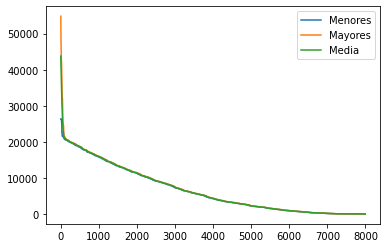

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

import random
import string


objetivo = "bioinformatics_programming"


GENES = 25
MAX_GENERACION = 10000


class Individuo(object):
    def __init__(self, adn, fitness):
        self.adn = adn
        self.fitness = fitness


def calcular_fitness(origen, valor_objetivo):
    fitness = 0
    for i in range(0, len(origen)):
        fitness += (ord(valor_objetivo[i]) - ord(origen[i])) ** 2
    return fitness


def mutacion(padre1, padre2):
    adn_hijo = padre1.adn[:]

    start = random.randint(0, len(padre2.adn) - 1)
    stop = random.randint(0, len(padre2.adn) - 1)
    if start > stop:
        stop, start = start, stop

    adn_hijo[start:stop] = padre2.adn[start:stop]

    posicion = random.randint(0, len(adn_hijo) - 1)
    adn_hijo[posicion] = chr(ord(adn_hijo[posicion]) + random.randint(-1, 1))
    fitness_hijo = calcular_fitness(adn_hijo, objetivo)
    return Individuo(adn_hijo, fitness_hijo)


def padre_al_azar(poblacion):
    return poblacion[int(random.random() * random.random() * (GENES - 1))]


def escribe_generacion(generacion, poblacion):
    print('Pasos de simulación: %d' % generacion)
    print()
    print('  Fitness         ADN')
    print('------------------------')
    for candidato in poblacion:
        print("%6i %15s" % (candidato.fitness, ''.join(candidato.adn)))
    print()


def inicializa_poblacion():
    poblacion = []
    for i in range(0, GENES):
        adn = [random.choice(string.printable[:-5]) for _ in range(0, len(objetivo))]
        fitness = calcular_fitness(adn, objetivo)
        candidate = Individuo(adn, fitness)
        poblacion.append(candidate)
    return poblacion


def simulacion():
    poblacion = inicializa_poblacion()
    generacion = 0
    # Para graficar el mínimo
    y= []
    # Para graficar el máximo
    y1=[]
    # Para graficar la media
    y2=[]
    while True and generacion < MAX_GENERACION:
        generacion += 1
        poblacion.sort(key=lambda candidate: candidate.fitness)
        y.append(poblacion[0].fitness)
        y1.append(poblacion[-1].fitness)
        sum=0
        for pob in poblacion:
          sum+=pob.fitness
        y2.append(sum/len(poblacion))
        if poblacion[0].fitness == 0:
            break

        padre1 = padre_al_azar(poblacion)
        padre2 = padre_al_azar(poblacion)

        hijo = mutacion(padre1, padre2)
        if hijo.fitness < poblacion[-1].fitness:
            poblacion[-1] = hijo

    if generacion == MAX_GENERACION:
        print(u'Se ha alcanzado el máximo de generaciones')
    escribe_generacion(generacion, poblacion)
    x= range(0,generacion)
    plt.plot(x,y,label="Menores")
    plt.plot(x,y1,label="Mayores")
    plt.plot(x,y2,label="Media")
    plt.legend()
    plt.show()
simulacion()


